C:\Users\admin\AppData\Local\Temp\ipykernel_6548\903830204.py:102: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  heatmap_colored = plt.cm.get_cmap(colormap)(heatmap_resized)


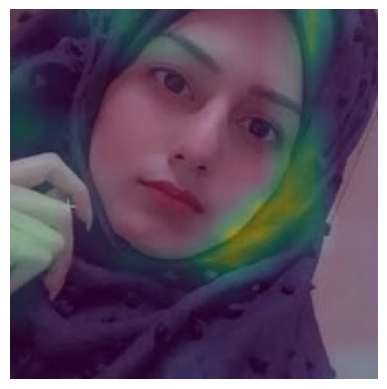

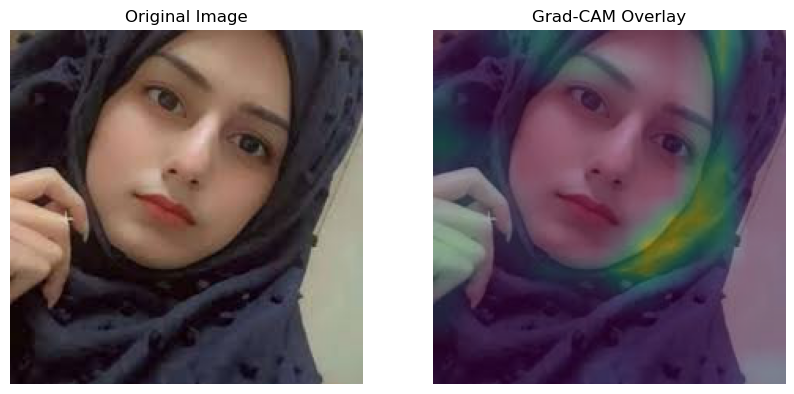

In [50]:
import tensorflow as tf
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions


# Load your pre-trained emotion detection model or use a pre-trained model like VGG16
model = VGG16(weights='imagenet')

# Preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Grad-CAM implementation
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Forward pass
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute mean intensity of gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply pooled gradients with the conv output to get heatmap
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


# Function to overlay heatmap on image
def overlay_heatmap_on_image(img_path, heatmap, alpha=0.4, colormap='viridis'):
    img = plt.imread(img_path)
    heatmap_resized = cv2.resize(heatmap,(img.shape[1],img.shape[0])) 
    
    heatmap_colored = plt.cm.get_cmap(colormap)(heatmap_resized)

    plt.cm.get_cmap(colormap)(heatmap_resized) 


# Preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Grad-CAM implementation
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Forward pass
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute mean intensity of gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply pooled gradients with the conv output to get heatmap
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


# Function to overlay heatmap on image
def overlay_heatmap_on_image(img_path, heatmap, alpha=0.4, colormap='viridis'):
    img = plt.imread(img_path)
    
    heatmap_resized = cv2.resize(heatmap,(img.shape[1],img.shape[0])) 
    
    heatmap_resized = np.interp(heatmap_resized, (heatmap_resized.min(), heatmap_resized.max()), (0, 1))

    heatmap_colored = plt.cm.get_cmap(colormap)(heatmap_resized)

    colormap_function = matplotlib.colormaps.get_cmap(colormap)
    heatmap_colored = colormap_function(heatmap_resized)[:, :, :3]



    heatmap_colored = np.uint8(255 * heatmap_colored)

    if img.max() <= 1:
        img = np.uint8(255 * img)

    if len(img.shape) == 2:  # If grayscale, convert to 3-channel
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    
    overlayed_image = cv2.addWeighted(img, 1 - alpha, heatmap_colored, alpha, 0)

    plt.imshow(overlayed_image)
    plt.axis('off')
    plt.show()

    return overlayed_image


# Example usage:
img_path = 'C:/Users/admin/Desktop/happy1.jfif'
img_array = load_and_preprocess_image(img_path)

# Get the last convolutional layer of the model (VGG16 has 'block5_conv3')
heatmap = make_gradcam_heatmap(img_array, model, 'block5_conv3')

# Overlay heatmap on the original image
overlay_image = overlay_heatmap_on_image(img_path, heatmap)

# Plot original and heatmap overlay image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread(img_path))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(overlay_image)
plt.title('Grad-CAM Overlay')
plt.axis('off')
plt.show()




   